HR Salary Dashboard – Train the Dataset and Predict Salary

### Problem Statement
The project discussed here is to implement data analysis tools and techniques and predict salary (<50 k or >50 k) (which is a classification prediction) using various features like age, education, workclass, country, occupation etc. And this is a binary classification problem. The dataset in use is the Adult census income dataset which contains about 32561 rows and 14 features.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('salarydata.csv') # reading the dataset
data.head() 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Checking the Basic details of Dataset
data.shape

(32561, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [ ]:
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [ ]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.isin(['?']).sum() # dataset contains meaningless values of '?' in certain columns

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [7]:
data = data.replace(to_replace='?', value=np.nan) # replacing fields having '?' with null values

In [ ]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
# Making sure that the data does not contain unecessary spaces.
data=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
# converting the target column into numerical classes (values of either 0 or 1).
data['salary'] = data['salary'].replace({'<=50K':0,'>50K':1})

**Exploratory Data Analysis & Preprocessing**

In [ ]:
# Exploring the descriptive statistics of the variables
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,30725,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561.000000
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [ ]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
data.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [10]:
uniq= pd.DataFrame(data.nunique(),columns=['Unique Values'])
uniq

,Unique Values
age,73
workclass,8
education,16
education-num,16
marital-status,7
occupation,14
relationship,6
race,5
sex,2
capital-gain,119


In [11]:
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [12]:
Total = data.isnull().sum().sort_values(ascending=False) 
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486
age,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000
sex,0,0.000000


In [13]:
# numeric features
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

In [14]:
# categoric features
categoric_features = data.select_dtypes(include='object')
categoric_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [15]:
# filling missing values
msv_col = ['workclass','occupation','native-country']
for col in msv_col:
    data[col] = data[col].fillna(data[col].mode()[0])

In [ ]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [16]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

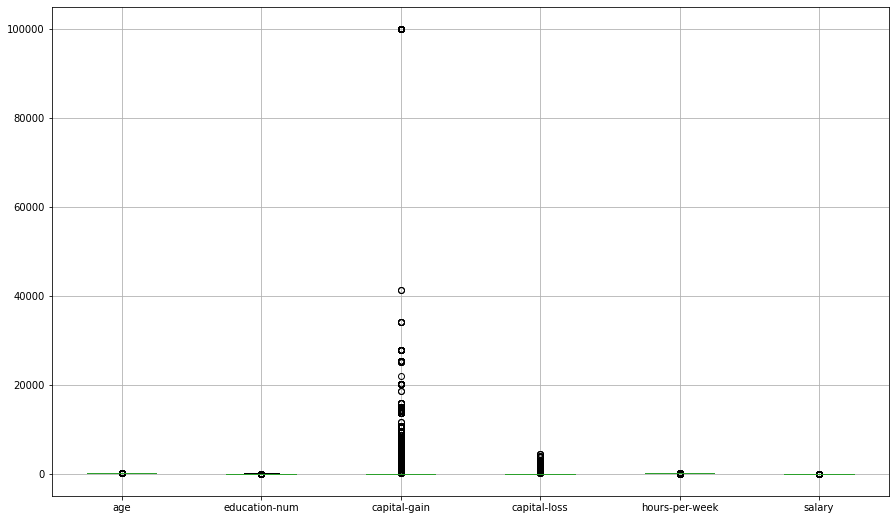

In [17]:
plt.rcParams['figure.figsize']=(15,9)
numeric_features.boxplot(column = ['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'])
plt.show()

Text(0.5, 1.0, 'AGE')

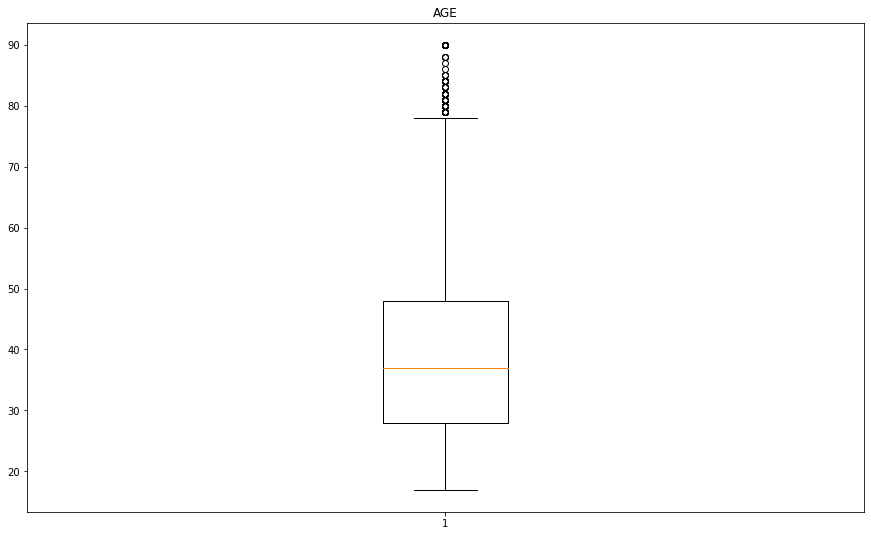

In [ ]:
plt.boxplot(data['age'])
plt.title('AGE')

Text(0.5, 1.0, 'Number of years of education')

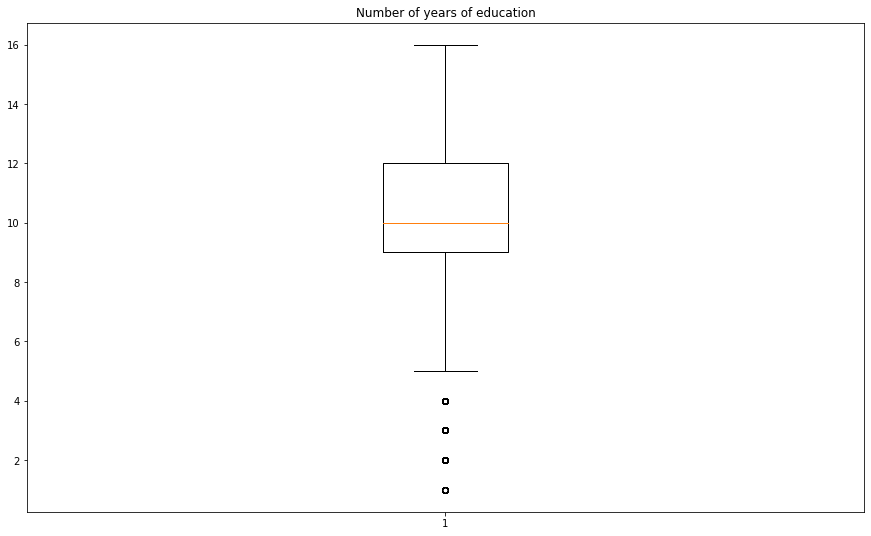

In [ ]:
plt.boxplot(data['education-num'])
plt.title('Number of years of education')

Capital gain and capital Loss does not play important role in salary prediction.Hence can be avoided while salary prediction modeling.

Text(0.5, 1.0, 'Capital Gain')

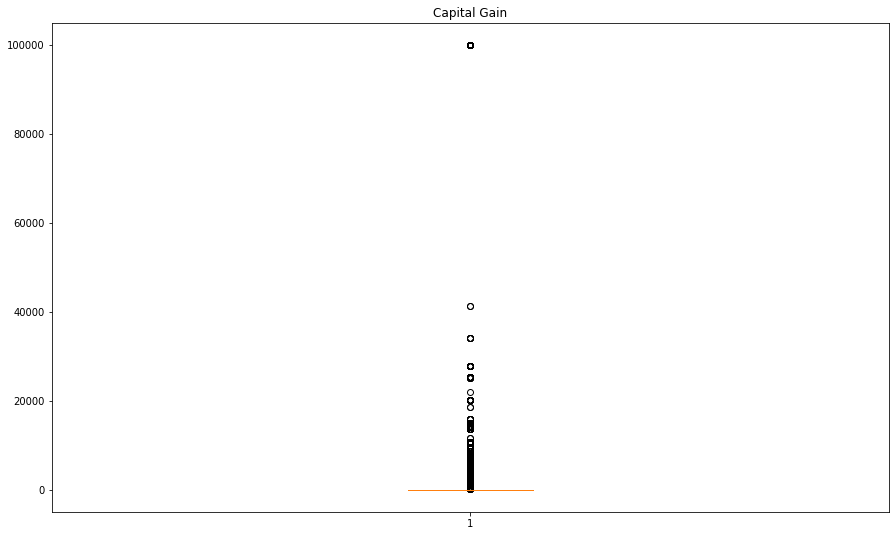

In [ ]:
plt.boxplot(data['capital-gain'])
plt.title('Capital Gain')

Text(0.5, 1.0, 'Capital Loss')

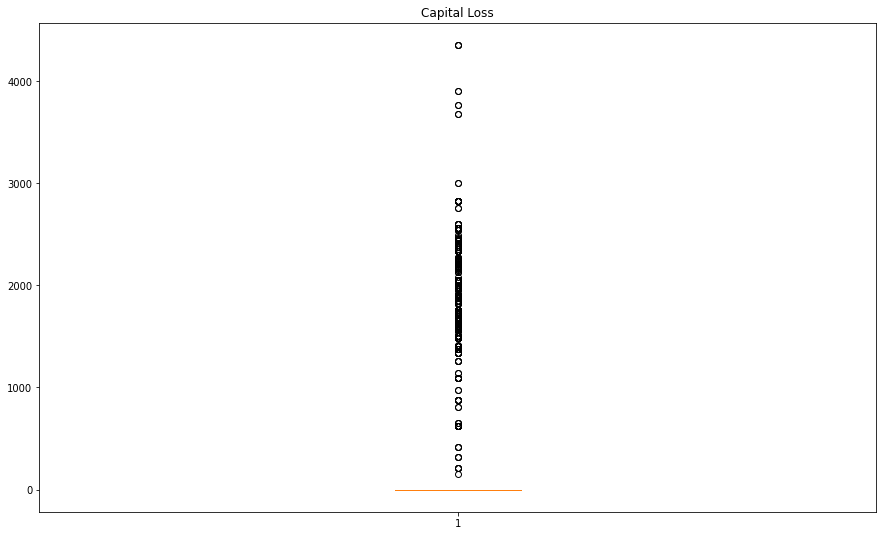

In [ ]:
plt.boxplot(data['capital-loss'])
plt.title('Capital Loss')

Text(0.5, 1.0, 'hours-per-week')

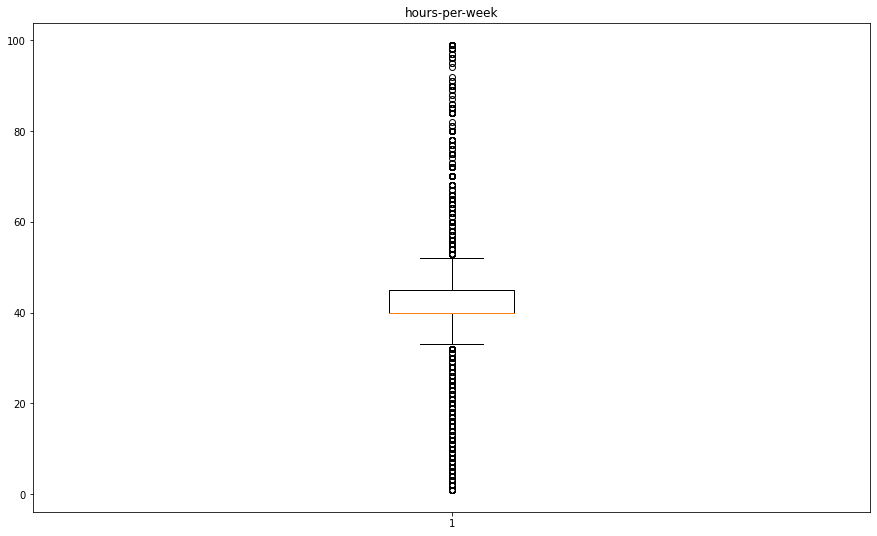

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.title('hours-per-week')

Text(0.5, 1.0, 'Salary')

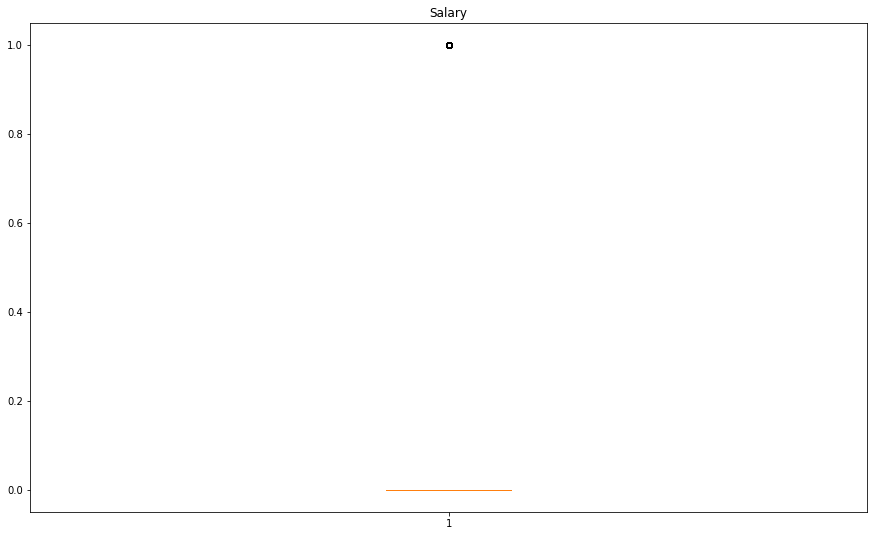

In [ ]:
plt.boxplot(data['salary'])
plt.title('Salary')

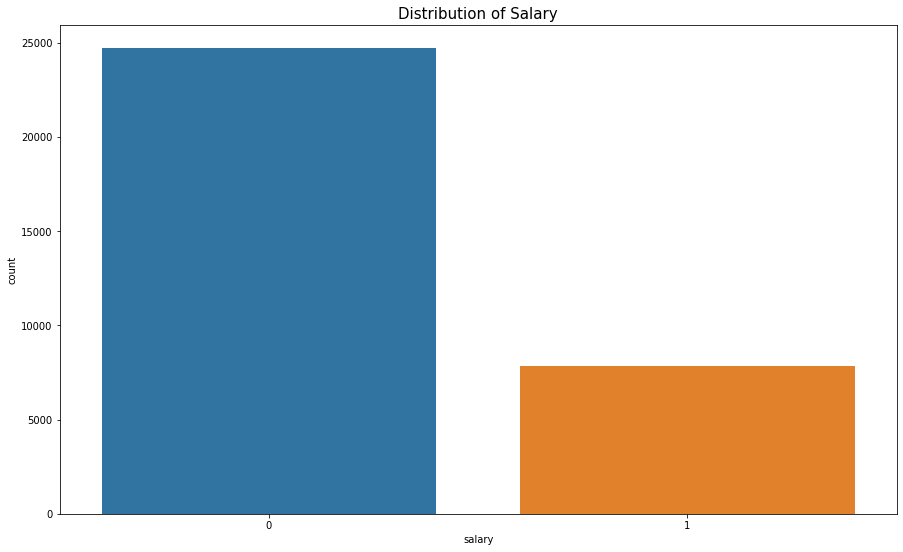

In [ ]:
sns.countplot(x='salary', data=data)
plt.title("Distribution of Salary", fontsize = 15)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

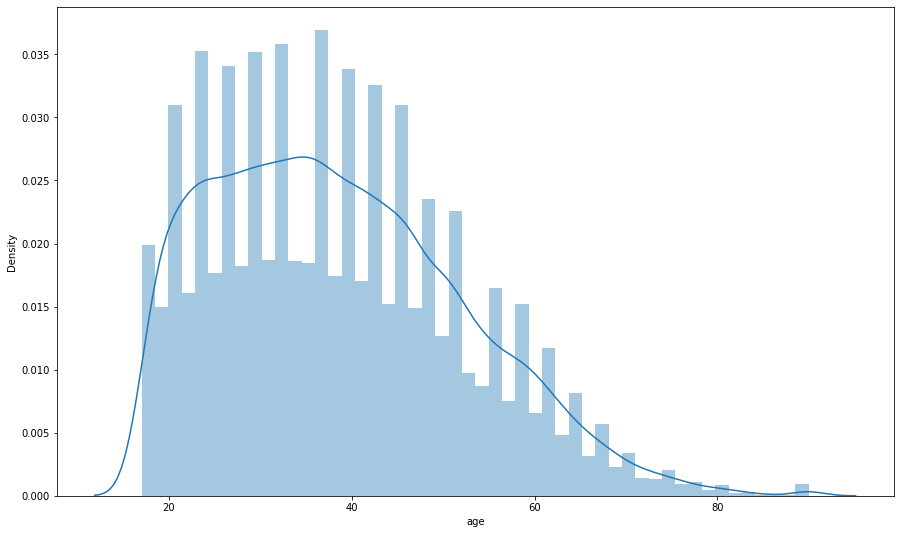

In [ ]:
sns.distplot(data['age'])

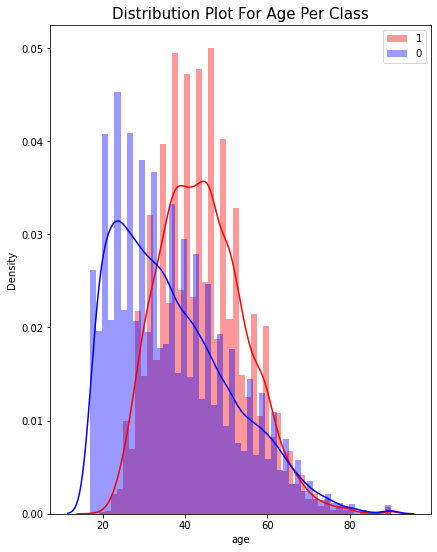

In [ ]:
# Distribution plot for age per class
plt.subplot(1,2,2)
sns.distplot(data[data['salary']==1]['age'], label='1', color='red')
sns.distplot(data[data['salary']==0]['age'], label='0', color='blue')
plt.legend()
plt.title('Distribution Plot For Age Per Class', fontsize = 15)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

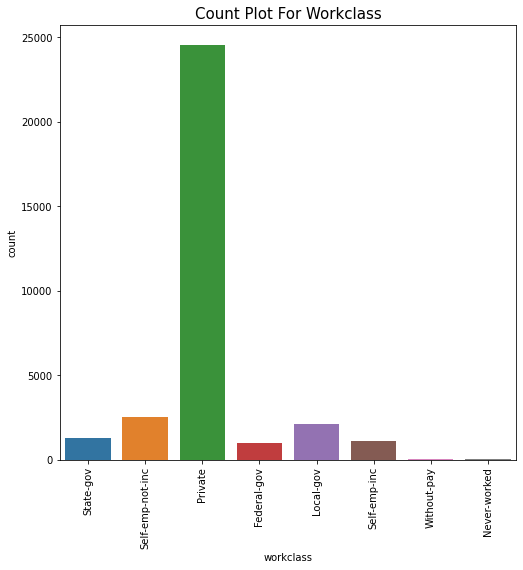

In [ ]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data['workclass'])
plt.title("Count Plot For Workclass", fontsize = 15)
plt.xticks(rotation=90)

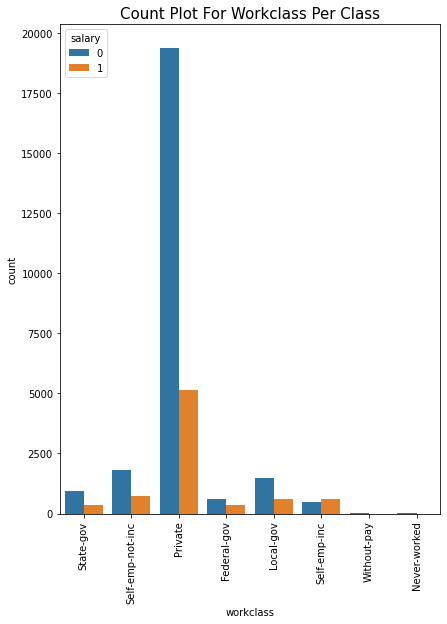

In [ ]:
# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=data, x='workclass', hue='salary')
plt.title("Count Plot For Workclass Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

* In this dataset most number of people are working in private sector.
* From second plot above, it is clear that those who have an annual income is more than 50K or less than 50K are work in private.

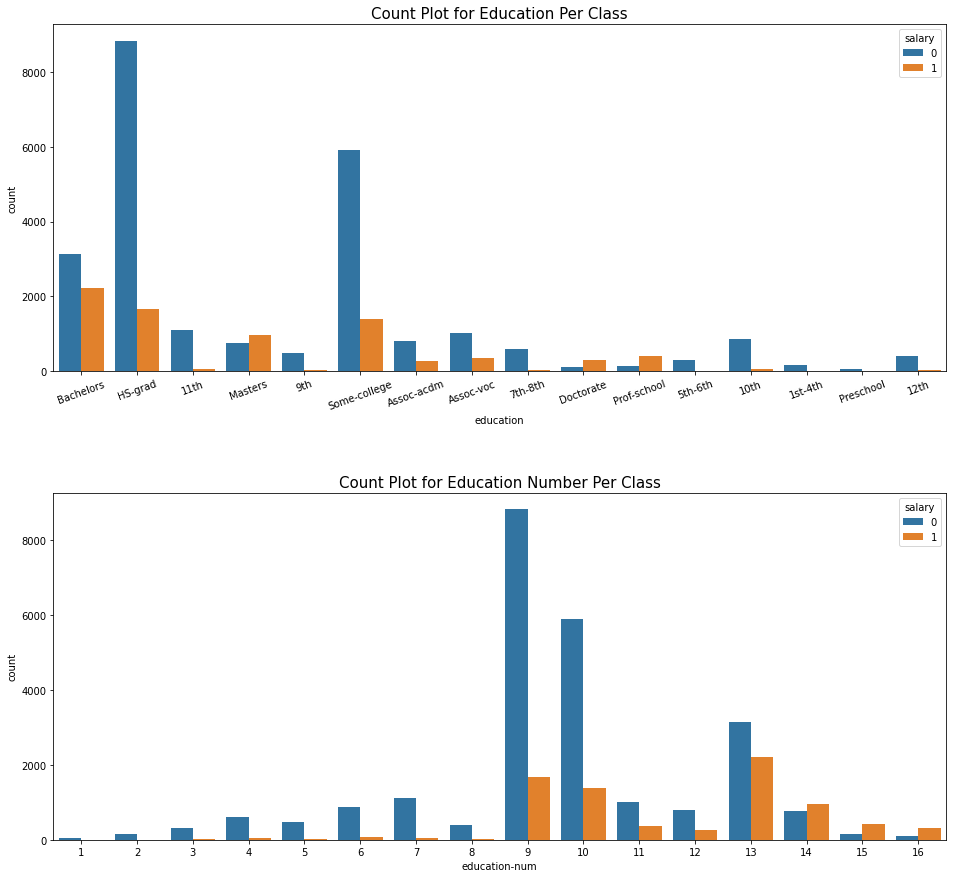

In [ ]:
# Count Plot for Education Per Class
plt.figure(figsize=[16,15])
plt.subplot(2,1,1)
sns.countplot(x='education', data=data, hue='salary')
plt.xticks(rotation=20)
plt.title("Count Plot for Education Per Class", fontsize = 15)

# Count Plot for Education Number Per Class
plt.subplot(2,1,2)
sns.countplot(x='education-num', data=data, hue='salary')
plt.title("Count Plot for Education Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

In [ ]:
education_classes = data['education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class, data[data['education'] == educ_class]['education-num'].unique()))

Bachelors, the Education Number is [13]
HS-grad, the Education Number is [9]
11th, the Education Number is [7]
Masters, the Education Number is [14]
9th, the Education Number is [5]
Some-college, the Education Number is [10]
Assoc-acdm, the Education Number is [12]
Assoc-voc, the Education Number is [11]
7th-8th, the Education Number is [4]
Doctorate, the Education Number is [16]
Prof-school, the Education Number is [15]
5th-6th, the Education Number is [3]
10th, the Education Number is [6]
1st-4th, the Education Number is [2]
Preschool, the Education Number is [1]
12th, the Education Number is [8]


In [18]:
# education & education number column are just the same, so dropping education number column.
data.drop(labels='education-num', axis=1, inplace=True)

In [ ]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'salary'],
      dtype='object')

From the analysis above, It's clear that education & education number column are just the same. so dropping education number column.

And In this dataset Most number of people are high school graduates with 9 to 10 years of education.

Text(0.5, 1.0, 'Countplot for Gender Per Class')

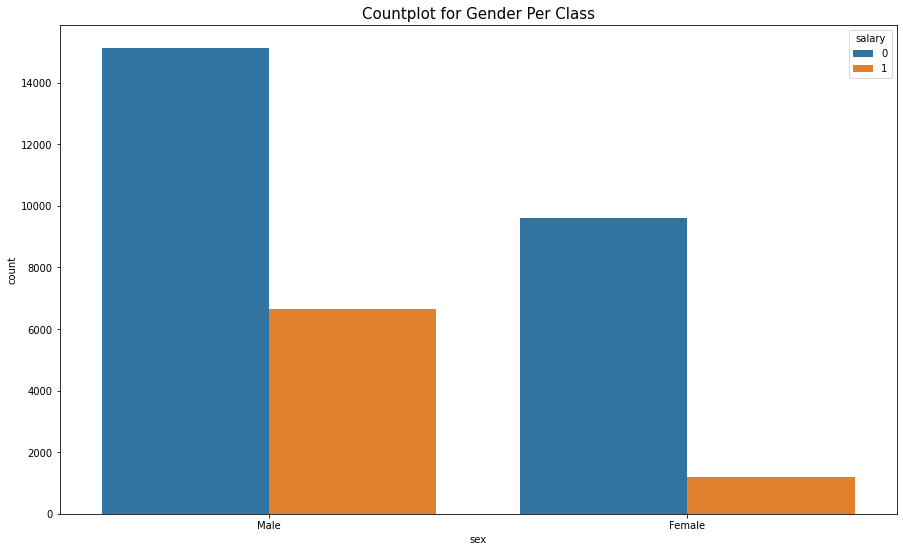

In [ ]:
# Count Plot For Gender Per Class
sns.countplot(x='sex' ,data=data, hue='salary')
plt.title("Countplot for Gender Per Class", fontsize = 15)

* The number of male candidates are more than female.
* When Comparing male and female, more percentage of male candidates are earn more than 50K.

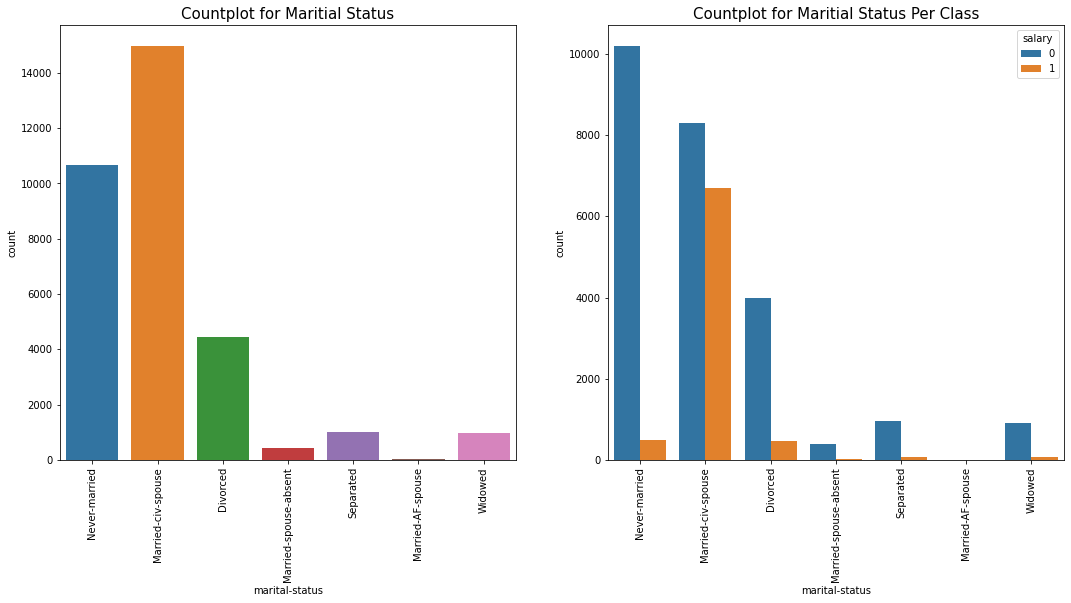


 --Value Counts-- 

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


In [ ]:
# Countplot for Maritial Status
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data['marital-status'])
plt.title("Countplot for Maritial Status", fontsize = 15)
plt.xticks(rotation=90)

# Countplot for Maritial Status Per Class
plt.subplot(1,2,2)
sns.countplot(data['marital-status'],hue=data['salary'])
plt.title("Countplot for Maritial Status Per Class", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(data['marital-status'].value_counts())

Most of the people whose annual income is more than 50K, their marital status is married.

In [19]:
# Transforming Maritial Status column with value as either married or not married.
data = data.replace({'Married-civ-spouse':'married','Married-AF-spouse':'married','Married-spouse-absent':'married',
                    'Never-married':'not married','Divorced':'not married','Separated':'not married','Widowed':'not married'})

In [ ]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,not married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,not married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


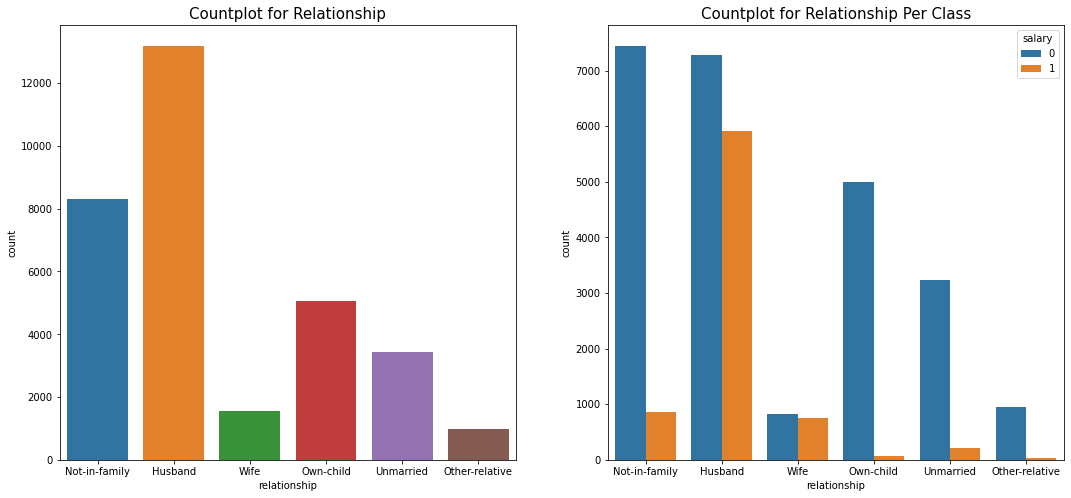


 --Value Counts-- 

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [ ]:
# Relationship
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data['relationship'])
plt.title('Countplot for Relationship', fontsize = 15)


plt.subplot(1,2,2)
sns.countplot(data['relationship'],hue=data['salary'])
plt.title('Countplot for Relationship Per Class', fontsize = 15)
plt.show()

print('\n --Value Counts-- \n')
print(data['relationship'].value_counts())

Text(0.5, 1.0, 'Countplot for Race Per Class')

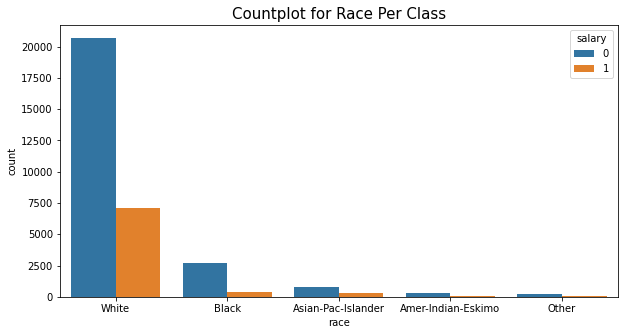

In [ ]:
# race
plt.figure(figsize=[10,5])
sns.countplot(data['race'], hue=data['salary'])
plt.title('Countplot for Race Per Class', fontsize = 15)

In this dataset majority of information about white race is more while all other races are lesser.

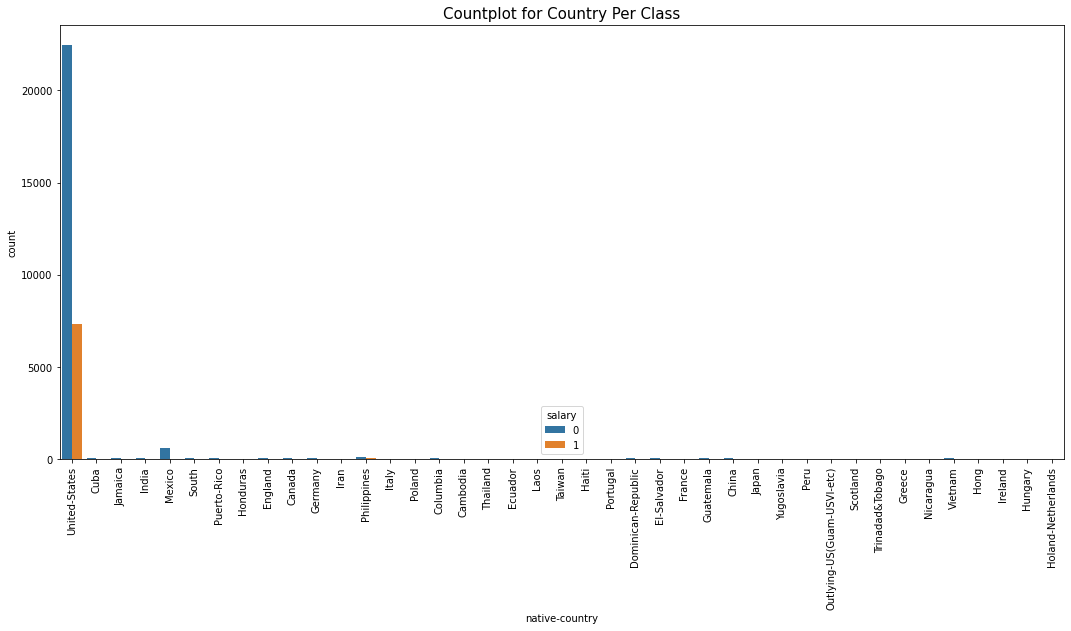


 --Value Counts-- 

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece 

In [ ]:
# Country
plt.figure(figsize=[18,8])
sns.countplot(data['native-country'],hue=data['salary'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

print('\n --Value Counts-- \n')
print(data['native-country'].value_counts())

print('\n-----------------------------------')
print('{}% people belong from united states.'
      .format(round(len(data[data['native-country']=='United-States'])/32561*100,2)))

print('{}% people belong from other country.'
      .format(round(len(data[data['native-country']!='United-States'])/32561*100,2)))

* From analysis above, 91.38% peoples are from United-states and only 8.62% people belong from other countries.
* And There are 41 countries in this column, so it's better if we transform this feature with value as either United States or Other

In [20]:
# Transforming native country column with value as either United States or Other.
countries = data['native-country'].unique()[1:]
data['native-country'] = data['native-country'].replace(to_replace=countries, value='Other')

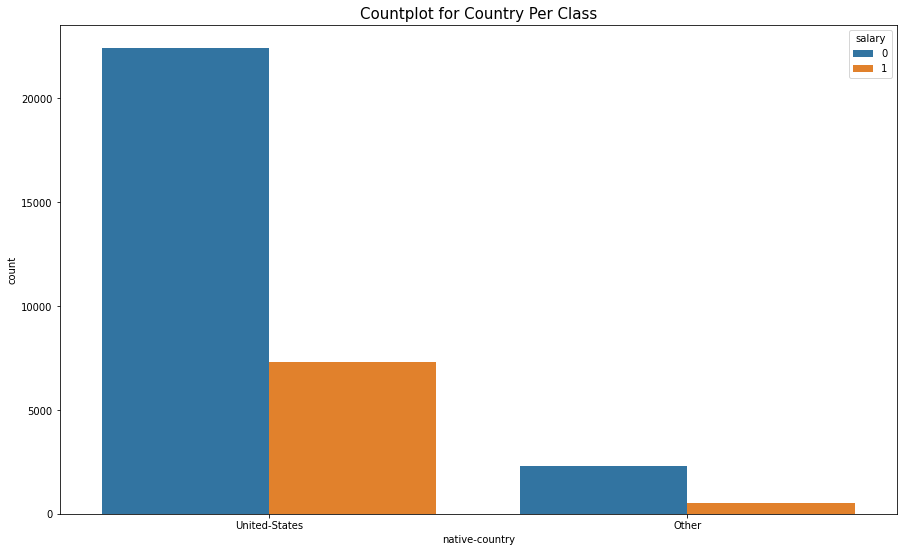

In [ ]:
# Countplot for Country Per Class
sns.countplot(data['native-country'], hue=data['salary'])
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()

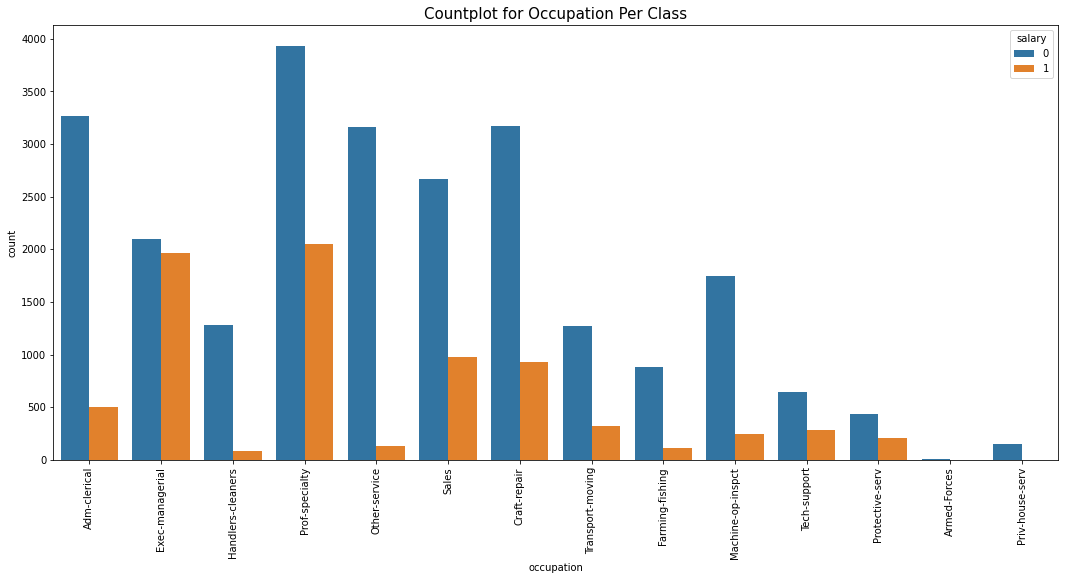

In [ ]:
# Occupation
plt.figure(figsize=[18,8])
sns.countplot(data['occupation'], hue=data['salary'])
plt.title('Countplot for Occupation Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In occupation column the values are well distributed in all categories

Text(0.5, 1.0, 'Distribution plot for hours per week')

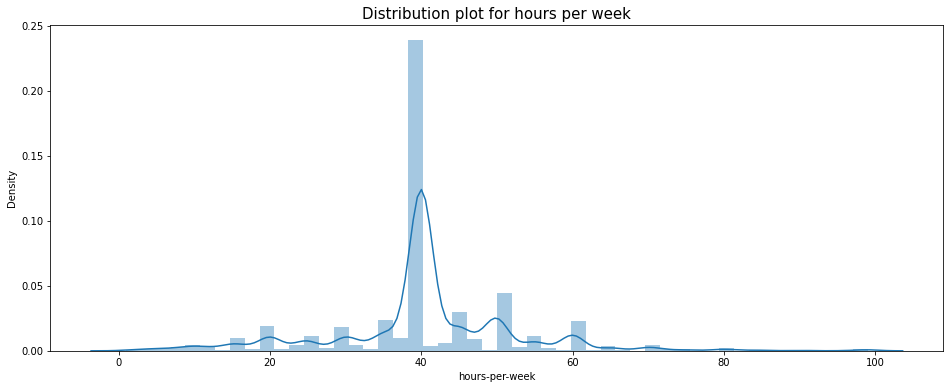

In [ ]:
# Distribution plot for hours per week column
plt.figure(figsize=[16,6])
sns.distplot(data['hours-per-week'])
plt.title('Distribution plot for hours per week', fontsize = 15)

By looking distribution plot for hours per weak column our data is aligned around the centre.
In this dataset most of the people work 30 to 40 hours per week

**Dealing with categorical variables**

In [21]:
# Categorical features
cat_df = data.select_dtypes(include=['object'])
num_df = data.select_dtypes(include=['int64'])

# Categorical column with their unique value
for i in cat_df.columns:
    print("{} : {} \n".format(i, cat_df[i].unique()))

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status : ['not married' 'married'] 

occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex : ['Male' 'Female'] 

native-country : ['United-States' 'Other'] 



Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
column = ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()

In [23]:
for col in column:
    data[col] = le.fit_transform(data[col])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,9,1,0,1,4,1,2174,0,40,1,0
1,50,5,9,0,3,0,4,1,0,0,13,1,0
2,38,3,11,1,5,1,4,1,0,0,40,1,0
3,53,3,1,0,5,0,2,1,0,0,40,1,0
4,28,3,9,0,9,5,2,0,0,0,40,0,0


In [24]:
data.drop(['capital-gain','capital-loss'],axis=1,inplace=True) # droping capital gain and loss because they have no much role in modeling
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,6,9,1,0,1,4,1,40,1,0
1,50,5,9,0,3,0,4,1,13,1,0
2,38,3,11,1,5,1,4,1,40,1,0
3,53,3,1,0,5,0,2,1,40,1,0
4,28,3,9,0,9,5,2,0,40,0,0


Feature Selection
* splitting as target variable (y) and features(X)

In [25]:
X=data.drop('salary',axis=1)
y=data['salary']

In [26]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler  # using standard scaling
scaler = StandardScaler()
scaler.fit(X[['age',  'hours-per-week']])
input_scaled = scaler.transform(X[['age',  'hours-per-week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age',  'hours-per-week'])

Train -test split

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

Model Creation

1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
#Defining Logistic Regression Model & fitting train data
lr=LogisticRegression()
logit_model=lr.fit(X_train,y_train)
#Predicting the result of test data using obtained model
y_pred_logit=logit_model.predict(X_test)

In [29]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
precision_score(y_test,y_pred_logit)

0.5816917728852838

In [30]:
accuracy_score(y_test,y_pred_logit)

0.780439121756487

2. Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)

In [32]:
precision_score(y_test,y_pred_dt)

0.5411003236245955

In [33]:
accuracy_score(y_test,y_pred_dt)

0.7782895746967603

3. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_rf=rf.fit(X_train,y_train)
y_pred_rf=model_rf.predict(X_test)

In [35]:
precision_score(y_test,y_pred_rf)

0.6451612903225806

In [36]:
accuracy_score(y_test,y_pred_rf)

0.8195915860586519

4 . SVM using rbf kernel

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import svm
best_svm = svm.SVC(kernel='rbf')
a1 = cross_val_score(best_svm, X, y, cv=5)
print(a1)

[0.77199447 0.77211302 0.77748771 0.77441646 0.77226658]


In [35]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
Y_pred_rbf=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,Y_pred_rbf))
print('Precision is:',precision_score(y_test,Y_pred_rbf,average='weighted'))
print('Recall is:',recall_score(y_test,Y_pred_rbf,average='weighted'))
print('f1 score is:',f1_score(y_test,Y_pred_rbf,average='weighted'))
print(classification_report(y_test,Y_pred_rbf))
print(confusion_matrix(y_test,Y_pred_rbf))

Accuracy on training data is: 0.7710764742014742
Accuracy is: 0.7735298633502227
Precision is: 0.7470062895392928
Recall is: 0.7735298633502227
f1 score is: 0.7133052012039341
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4942
           1       0.64      0.14      0.23      1571

    accuracy                           0.77      6513
   macro avg       0.71      0.56      0.55      6513
weighted avg       0.75      0.77      0.71      6513

[[4819  123]
 [1352  219]]


5. XGB Classifier

In [37]:
# XGBClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [37]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.14%


In [40]:
pd.Series(model_rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100
param_grid = { 
    'n_estimators': [5,10,20],
    'max_depth' : [10,15,20],
    'criterion' :['gini', 'entropy']
}

Grid search CV

In [38]:
from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
param_grid = {'C': [1,10,100,1000]}
# Instantiating logistic regression classifier
logreg = LogisticRegression()
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
logreg_cv.predict(X_test)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.7794070428083094


In [39]:
pd.Series(model_rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

age               29.415436
hours-per-week    14.081068
education         13.784199
occupation        11.626026
marital-status     9.598777
relationship       9.594988
workclass          6.273435
race               2.409349
sex                1.979505
native-country     1.237216
dtype: float64

In [40]:
param_grid = { 
    'n_estimators': [5,10,20],
    'max_depth' : [10,15,20],
    'criterion' :['gini', 'entropy']
}

In [41]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}

In [42]:
rft = RandomForestClassifier(n_estimators=10,max_depth=10,random_state=42,criterion='entropy') # n estimators implies how many times tress/ brances/ estimations are taking place
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       random_state=42)

In [43]:
y_pred=rft.predict(X_test)
accuracy_score(y_test,y_pred)


0.8374021188392445

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4942
           1       0.70      0.57      0.63      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



In [46]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',78.04],['Random Forest',83.74]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X=np.array(X)
y=data['salary'].values
y=np.array(y)

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      78.04 │
├─────────────────────┼────────────┤
│ Random Forest       │      83.74 │
╘═════════════════════╧════════════╛


Reshaping X and y and converting to array so that they are in required form for app.py file execution in VS code

In [46]:
X

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,9,1,0,1,4,1,40,1
1,50,5,9,0,3,0,4,1,13,1
2,38,3,11,1,5,1,4,1,40,1
3,53,3,1,0,5,0,2,1,40,1
4,28,3,9,0,9,5,2,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,0,12,5,4,0,38,1
32557,40,3,11,0,6,0,4,1,40,1
32558,58,3,11,1,0,4,4,0,40,1
32559,22,3,11,1,0,3,4,1,20,1


In [47]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [48]:
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X=np.array(X)

In [49]:
y=data['salary'].values
y=np.array(y)

Generating Pickle file

In [50]:
import pickle
filename = 'salary_pred_model.pkl'
pickle.dump(rft,open(filename,'wb')) # wb for write permission
loaded_model = pickle.load(open(filename,'rb')) # rb for read permission